In [1]:
import torch
import torch.nn.functional as F

import matplotlib.pyplot as plt

In [2]:
from torch.autograd import Variable
x = torch.linspace(-5, 5, 200) # shape=(100,1)
# x = Variable()
# b = torch.tensor(3., requires_grad=True)
x_np = x.numpy()

y_relu = F.relu(x).numpy()
y_sigmoid = F.sigmoid(x).numpy()
y_tanh = F.tanh(x).numpy()
# y_softmax = F.softmax(x).numpy()
y_softplus = F.softplus(x).numpy()

D:\software\anaconda\envs\tensorflow\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
D:\software\anaconda\envs\tensorflow\lib\site-packages\torch\nn\functional.py:1614: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


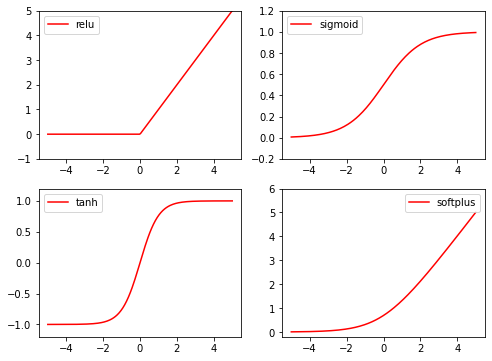

In [7]:
plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1,5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sigmoid, c='red', label='sigmoid')
plt.ylim((-0.2,1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2,1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

In [8]:
#一维数据变二维
x= torch.unsqueeze(torch.linspace(-1,1, 100), dim=1) # shape(100,1)
y = x.pow(2) + 0.2*torch.rand(x.size()) # noisy y

x,y

(tensor([[-1.0000],
         [-0.9798],
         [-0.9596],
         [-0.9394],
         [-0.9192],
         [-0.8990],
         [-0.8788],
         [-0.8586],
         [-0.8384],
         [-0.8182],
         [-0.7980],
         [-0.7778],
         [-0.7576],
         [-0.7374],
         [-0.7172],
         [-0.6970],
         [-0.6768],
         [-0.6566],
         [-0.6364],
         [-0.6162],
         [-0.5960],
         [-0.5758],
         [-0.5556],
         [-0.5354],
         [-0.5152],
         [-0.4949],
         [-0.4747],
         [-0.4545],
         [-0.4343],
         [-0.4141],
         [-0.3939],
         [-0.3737],
         [-0.3535],
         [-0.3333],
         [-0.3131],
         [-0.2929],
         [-0.2727],
         [-0.2525],
         [-0.2323],
         [-0.2121],
         [-0.1919],
         [-0.1717],
         [-0.1515],
         [-0.1313],
         [-0.1111],
         [-0.0909],
         [-0.0707],
         [-0.0505],
         [-0.0303],
         [-0.0101],


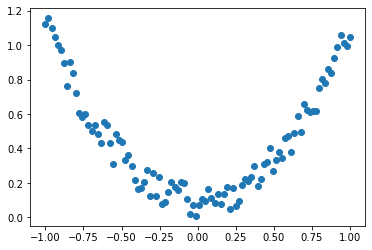

In [9]:
plt.scatter(x.numpy(),y.numpy())
plt.show()


In [11]:
class Net(torch.nn.Module):
    def __init__(self,n_features, n_hidden, n_output):
        super(Net,self).__init__()
        self.hidden = torch.nn.Linear(n_features,n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self,x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

In [12]:
net = Net(1, 10, 1)
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [18]:
plt.ion() #实时打印
plt.show()
optimizer = torch.optim.SGD(net.parameters(),lr=0.5)
loss_func = torch.nn.MSELoss()


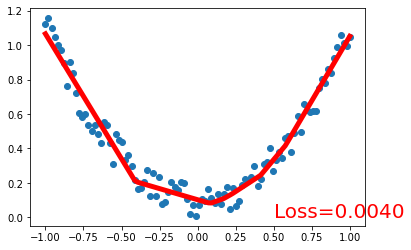

In [21]:
for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.show()
        plt.pause(1)

plt.ioff()